# Defining goals
The goal of this workbook is to compile one clean dataset combining all resources from BTS and kerosene jet prices to see which has an effect and which does not. Furthermore, this will be exported for other visualizatoins.

In [1]:
# IMPORT STATEMENTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
# IMPORT CLEANSET FUNC
from cleanSet.cleanSet import cleanSet
from cleanSet.timeSeriesEda import timeSeriesEda

KARPSAC jet fuel prices to know U.S. jet fuel prices.

In [3]:
# SAVE KAPRSAC JET FUEL PRICES IN A DATAFRAME
jet_fuel = pd.read_csv("data-sources/KARPSAC-jetfuelprices-2010to2020.csv", sep=";") # original data set
# CLEAN UP DATA TO PERFORM GROUPBY ANALYSIS
jet_fuel['YEAR'] = jet_fuel['Date'].astype(str).str[0:4]
jet_fuel['MONTH'] = jet_fuel['Date'].astype(str).str[5:7]
del jet_fuel['Date']

In [4]:
#CHANGE NUMERICAL MONTH TO MONTHS
month_lookup = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May',
                '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October',
                '11': 'November','12': 'December'}
jet_fuel['MONTH'] = jet_fuel['MONTH'].apply(lambda x: month_lookup[x])
jet_fuel['MONTH YEAR'] = jet_fuel['MONTH'] + ' ' +  jet_fuel['YEAR']
jet_fuel.set_index('MONTH YEAR')
# FIND MEAN OF THESE PRICES
jet_fuel = jet_fuel.groupby(['MONTH YEAR']).mean()
jet_fuel

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
MONTH YEAR,
April 1990,0.540045
April 1991,0.552773
April 1992,0.545238
April 1993,0.551158
April 1994,0.469050
...,...
September 2015,1.392952
September 2016,1.321000
September 2017,1.778789


BTS PASSENGER flight departure data.

In [17]:
# IMPORT BTS DOMESTICS DATA DEPARTURES PERFORMED
dom_flight = pd.read_csv('data-sources/USCarrier_Traffic_DOM.csv', sep='","', engine='python', skiprows=1)
intl_flight = pd.read_csv('data-sources/USCarrier_Traffic_INTL.csv', sep='","', engine='python', skiprows=1)

combined_flight = cleanSet(dom_flight, intl_flight, 'combined_flight', 'Total Dom. Passenger Flights',
                          'Total Intl. Passenger Flights', 'Total Passenger Flights')

combined_flight

,Total Dom. Passenger Flights,Total Intl. Passenger Flights,Total Passenger Flights
PERIOD,,,
January 2000,623794,51459,675253
February 2000,605936,49157,655093
March 2000,667027,54263,721290
April 2000,635767,52826,688593
May 2000,672835,55358,728193
...,...,...,...
December 2019,729109,74909,804018
January 2020,708984,73377,782361
February 2020,668537,67801,736338


BTS Passenger passenger enplanement data.

In [30]:
# IMPORT BTS DOMESTICS DATA DEPARTURES PERFORMED
# define datasets
dom_flight = pd.read_csv('data-sources/USCarrier_Traffic_cargo_DOM.csv', sep='","', engine='python', skiprows=1)
intl_flight = pd.read_csv('data-sources/USCarrier_Traffic_cargo_INTL.csv', sep='","', engine='python', skiprows=1)

combined_enplanements = cleanSet(dom_flight, intl_flight, 'cleaned_enplanements', 'Total Dom. Passenger Enplanements', 'Total Intl. Passenger Enplanements', 'Total Passenger Enplanements')
combined_enplanements

,Total Dom. Passenger Enplanements,Total Intl. Passenger Enplanements,Total Passenger Enplanements
PERIOD,,,
January 2000,954,10423,11377
February 2000,985,10639,11624
March 2000,1060,11598,12658
April 2000,1143,10558,11701
May 2000,1095,12209,13304
...,...,...,...
December 2019,56928,14118,71046
January 2020,48607,15027,63634
February 2020,44918,13646,58564


BTS CARGO flight departure data.

## EDA on new dataset

Text(0.5, 1.0, 'Time analysis total passenger enplanements')

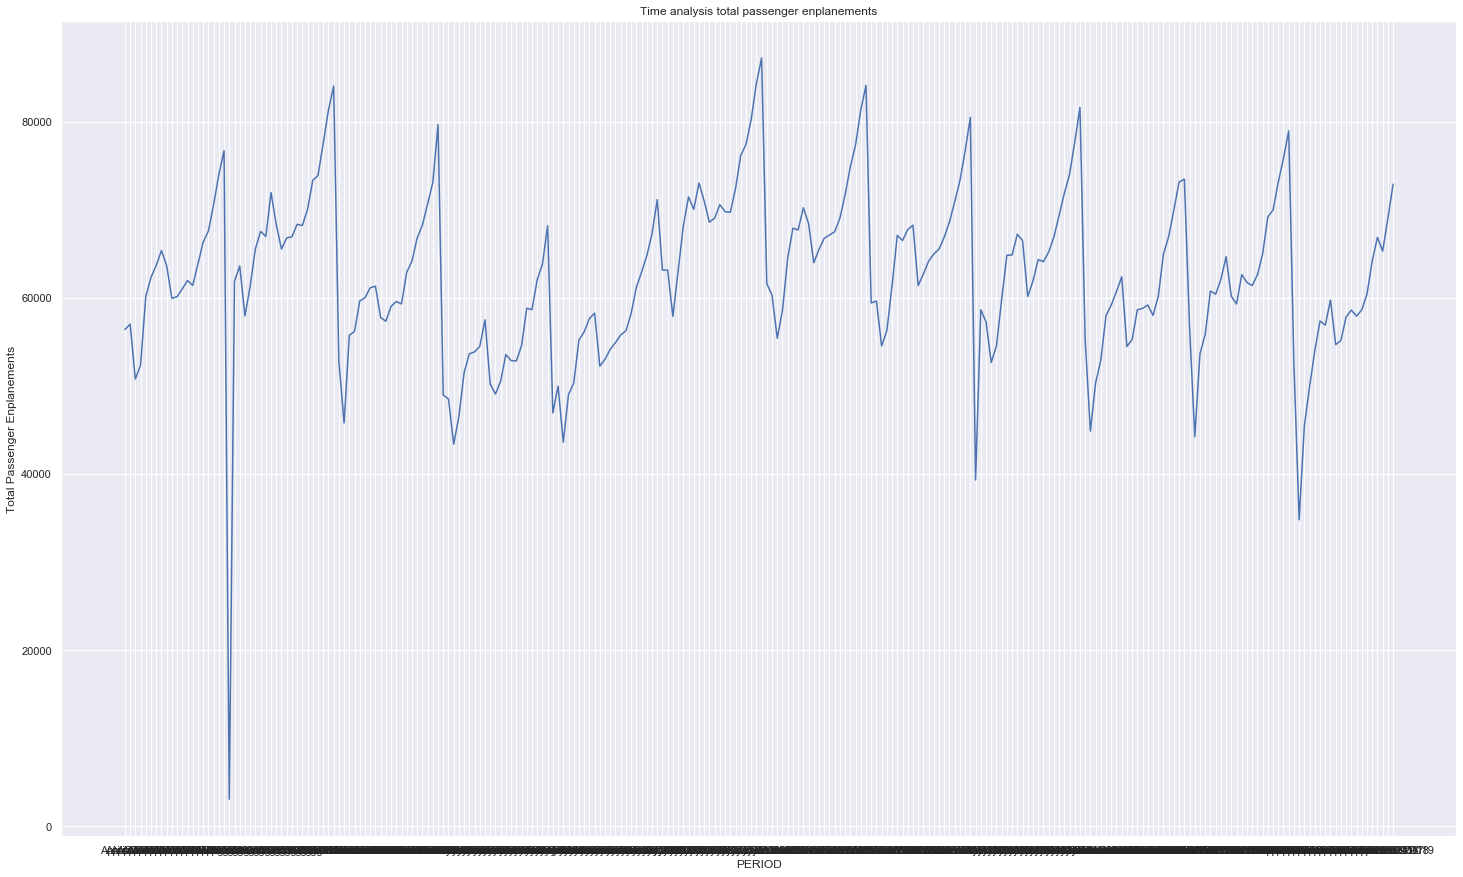

In [36]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_enplane.index, y=combined_enplane['Total Passenger Enplanements'])

plt.title("Time analysis total passenger enplanements")

Hit a dip during 9/11. Has seasonality as well, although demand has not drastically decreased during COVID and has mostly remained the same.

Text(0.5, 1.0, 'Time analysis total domestic flight cargo departures')

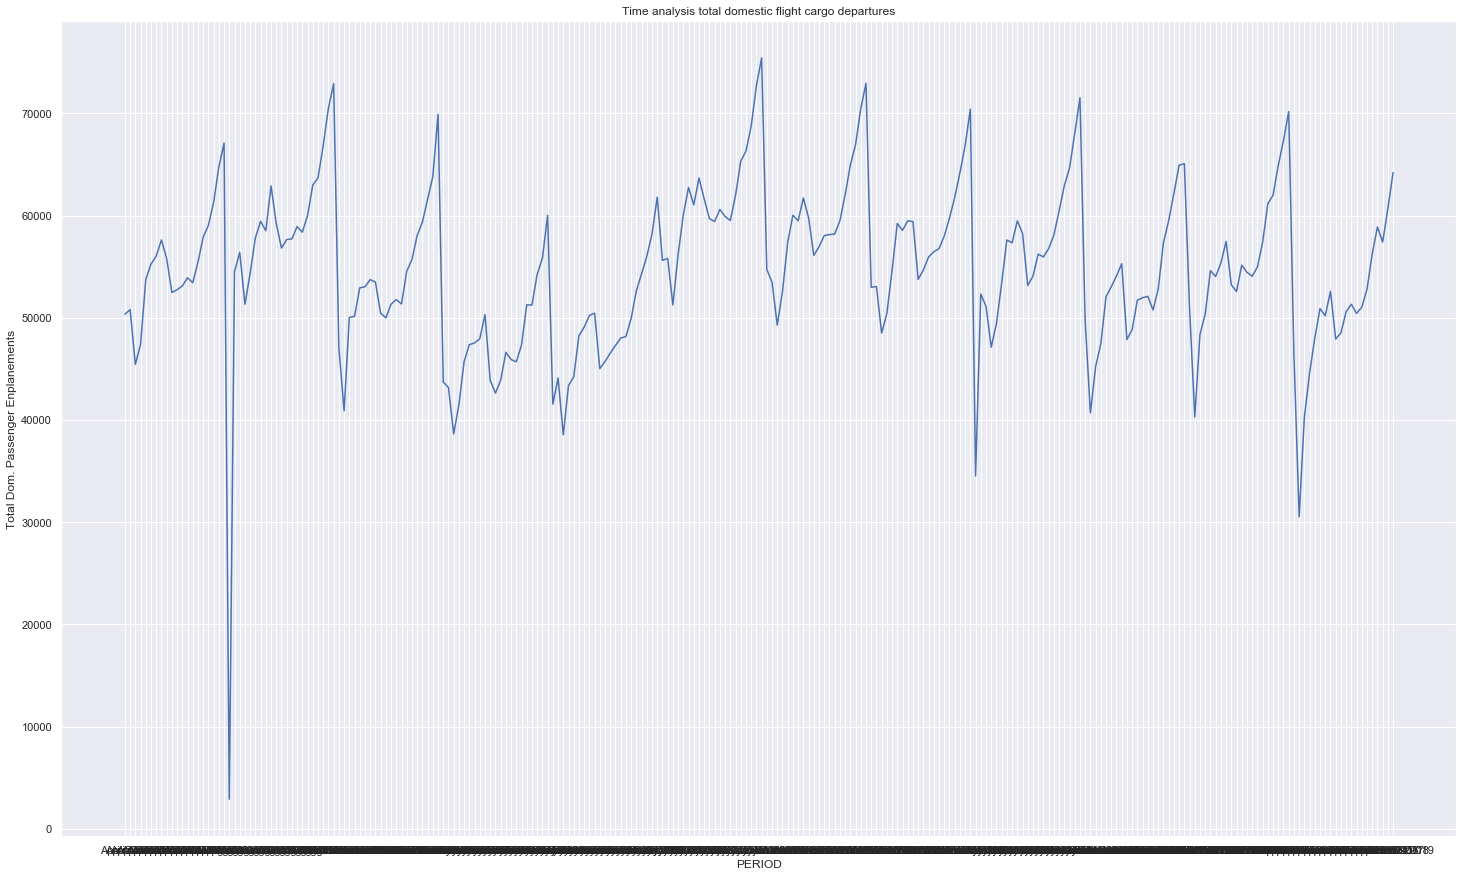

In [20]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_enplane.index, y=combined_enplane['Total Dom. Passenger Enplanements'].astype(float))

plt.title("Time analysis total domestic flight cargo departures")

Text(0.5, 1.0, 'Time analysis total domestic flight cargo departures')

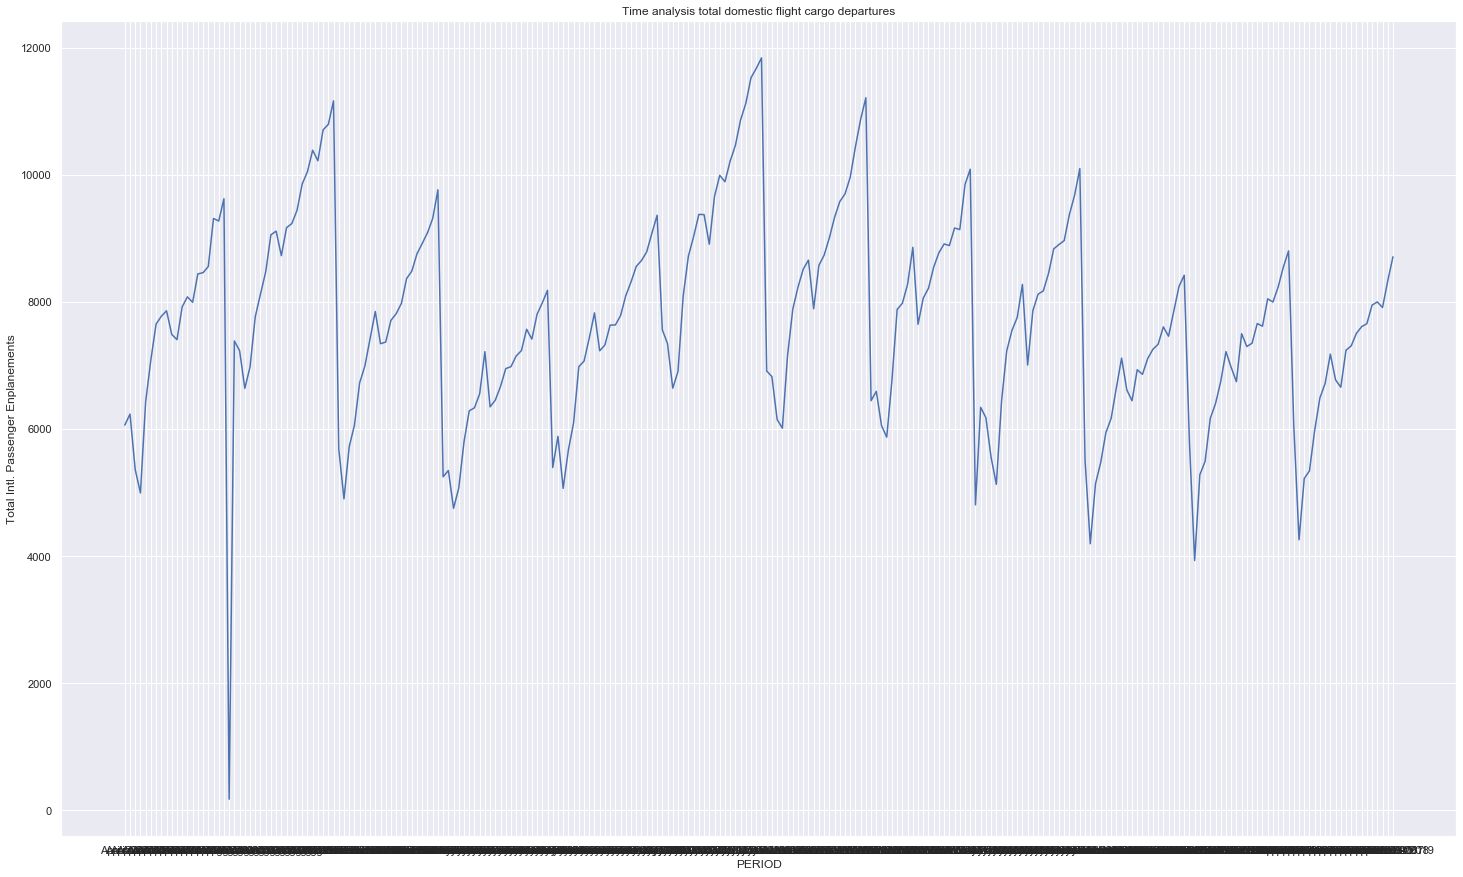

In [21]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_enplane.index, y=combined_enplane['Total Intl. Passenger Enplanements'].astype(float))

plt.title("Time analysis total domestic flight cargo departures")

All showed dips in 2001. All hold similar shapes, but none are drastically worse. In fact, international flights are trending HIGHER this year.

In [47]:
# IMPORT BTS DOMESTICS COMBINED REVENUE MILES
dom_flight = pd.read_csv('data-sources/RevenuePassengerMilesDOM.csv', sep='","', engine='python', skiprows=1)
intl_flight = pd.read_csv('data-sources/RevenuePassengerMilesINTL.csv', sep='","', engine='python', skiprows=1)

combined_revenue_miles = cleanSet(dom_flight, intl_flight, 'combined_revenue_miles', 'Total Dom. Revenue Miles',
                          'Total Intl Revenue Miles', 'Total Revenue Miles')
combined_revenue_miles

,Total Dom. Revenue Miles,Total Intl Revenue Miles,Total Revenue Miles
PERIOD,,,
January 2000,34933923,14111488,49045411
February 2000,36023970,13282332,49306302
March 2000,43912920,16530620,60443540
April 2000,41963837,16322844,58286681
May 2000,43178325,17355458,60533783
...,...,...,...
December 2019,65460027,24911387,90371414
January 2020,57813919,23698246,81512165
February 2020,55525935,18882143,74408078


Text(0.5, 1.0, 'Time analysis total revenue miles')

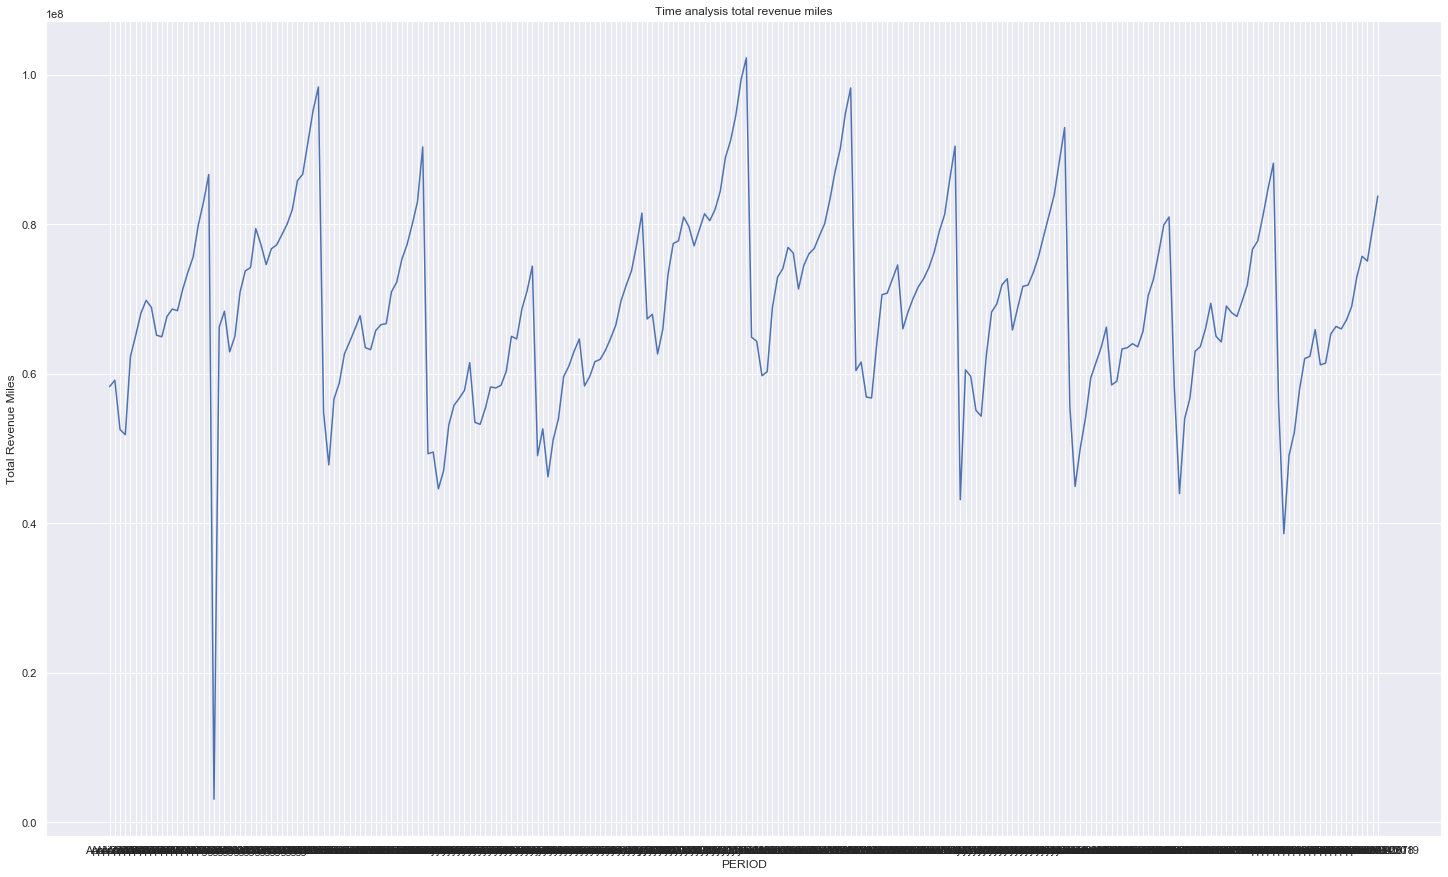

In [50]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_revenue_miles.index, y=combined_revenue_miles['Total Revenue Miles'])

plt.title("Time analysis total revenue miles")

In [48]:
# IMPORT BTS DOMESTICS REVENUE SEAT MILES
dom_flight = pd.read_csv('data-sources/RevenueSeatMilesDOM.csv', sep='","', engine='python', skiprows=1)
intl_flight = pd.read_csv('data-sources/RevenueSeatMilesINTL.csv', sep='","', engine='python', skiprows=1)

combined_seat_miles = cleanSet(dom_flight, intl_flight, 'combined_seat_miles', 'Total Dom. Revenue Seat Miles',
                          'Total Intl Revenue Seat Miles', 'Total Revenue Seat Miles')
combined_seat_miles

,Total Dom. Revenue Seat Miles,Total Intl Revenue Seat Miles,Total Revenue Seat Miles
PERIOD,,,
January 2000,56316092,20933627,77249719
February 2000,54354846,19604814,73959660
March 2000,59927517,21457740,81385257
April 2000,57418335,21659049,79077384
May 2000,58913633,22641340,81554973
...,...,...,...
December 2019,76567702,29677093,106244795
January 2020,72874850,29427102,102301952
February 2020,68986791,25058070,94044861


Text(0.5, 1.0, 'Time analysis total available passenger seat miles')

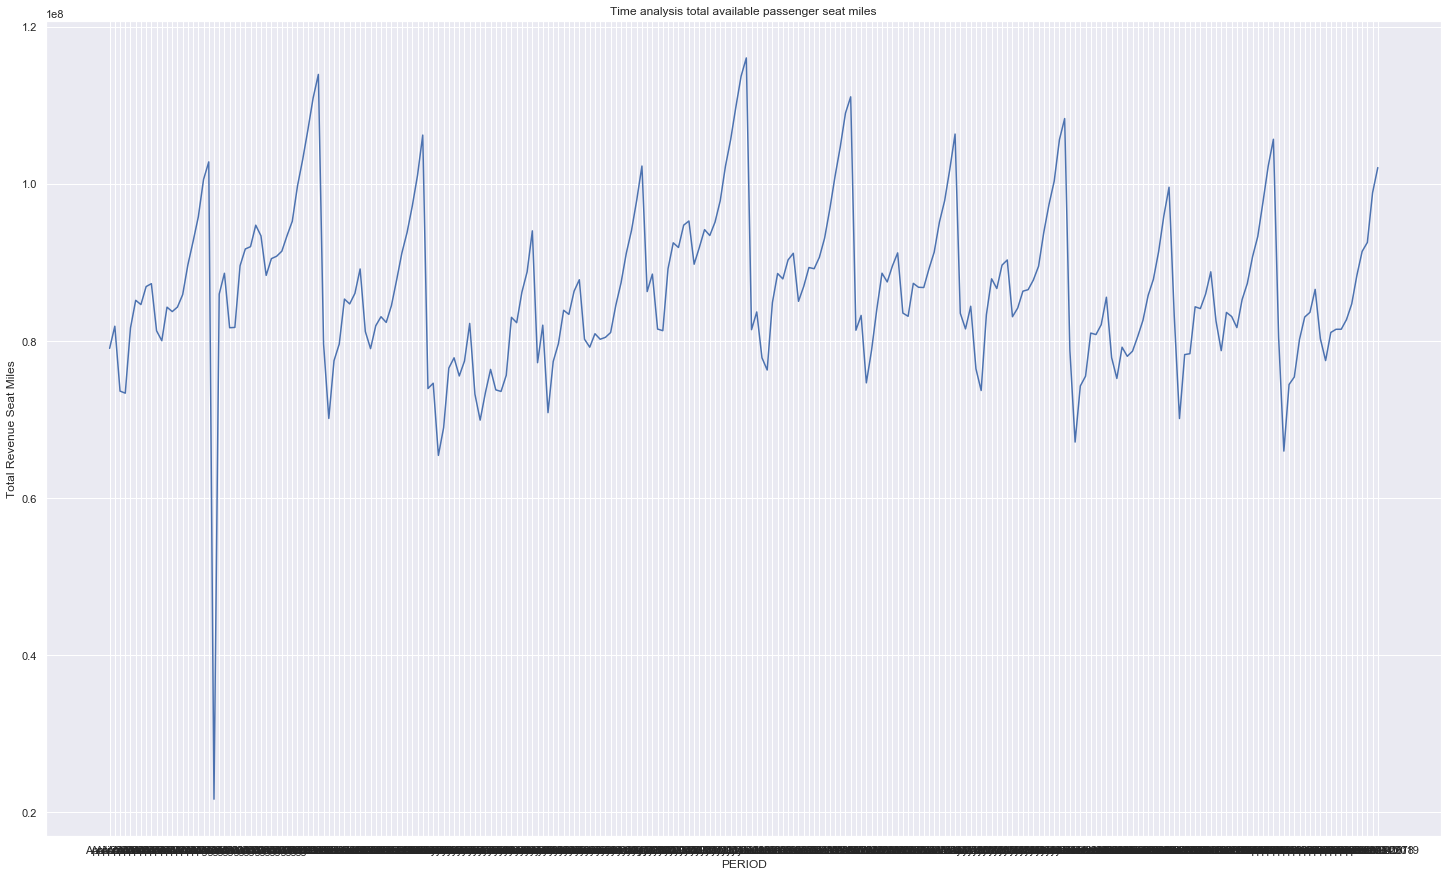

In [51]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_seat_miles.index, y=combined_seat_miles['Total Revenue Seat Miles'])

plt.title("Time analysis total available passenger seat miles")

In [56]:
# IMPORT BTS DOMESTICS FREIGHT TON MILES
dom_flight = pd.read_csv('data-sources/FreightTonMilesDOM.csv', sep='","', engine='python', skiprows=1)
intl_flight = pd.read_csv('data-sources/FreightTonMilesINTL.csv', sep='","', engine='python', skiprows=1)

combined_freight_miles = cleanSet(dom_flight, intl_flight, 'combined_freight_miles', 'Total Dom. Freight Ton Miles',
                          'Total Intl Freight Ton Miles', 'Total Freight Ton Miles')
combined_freight_miles

,Total Dom. Freight Ton Miles,Total Intl Freight Ton Miles,Total Freight Ton Miles
PERIOD,,,
January 2000,136488,419356,555844
February 2000,154167,469782,623949
March 2000,177053,529229,706282
April 2000,167926,497904,665830
May 2000,175368,500130,675498
...,...,...,...
December 2019,86948,524269,611217
January 2020,81297,483816,565113
February 2020,83121,464428,547549


Text(0.5, 1.0, 'Time analysis total freight ton miles')

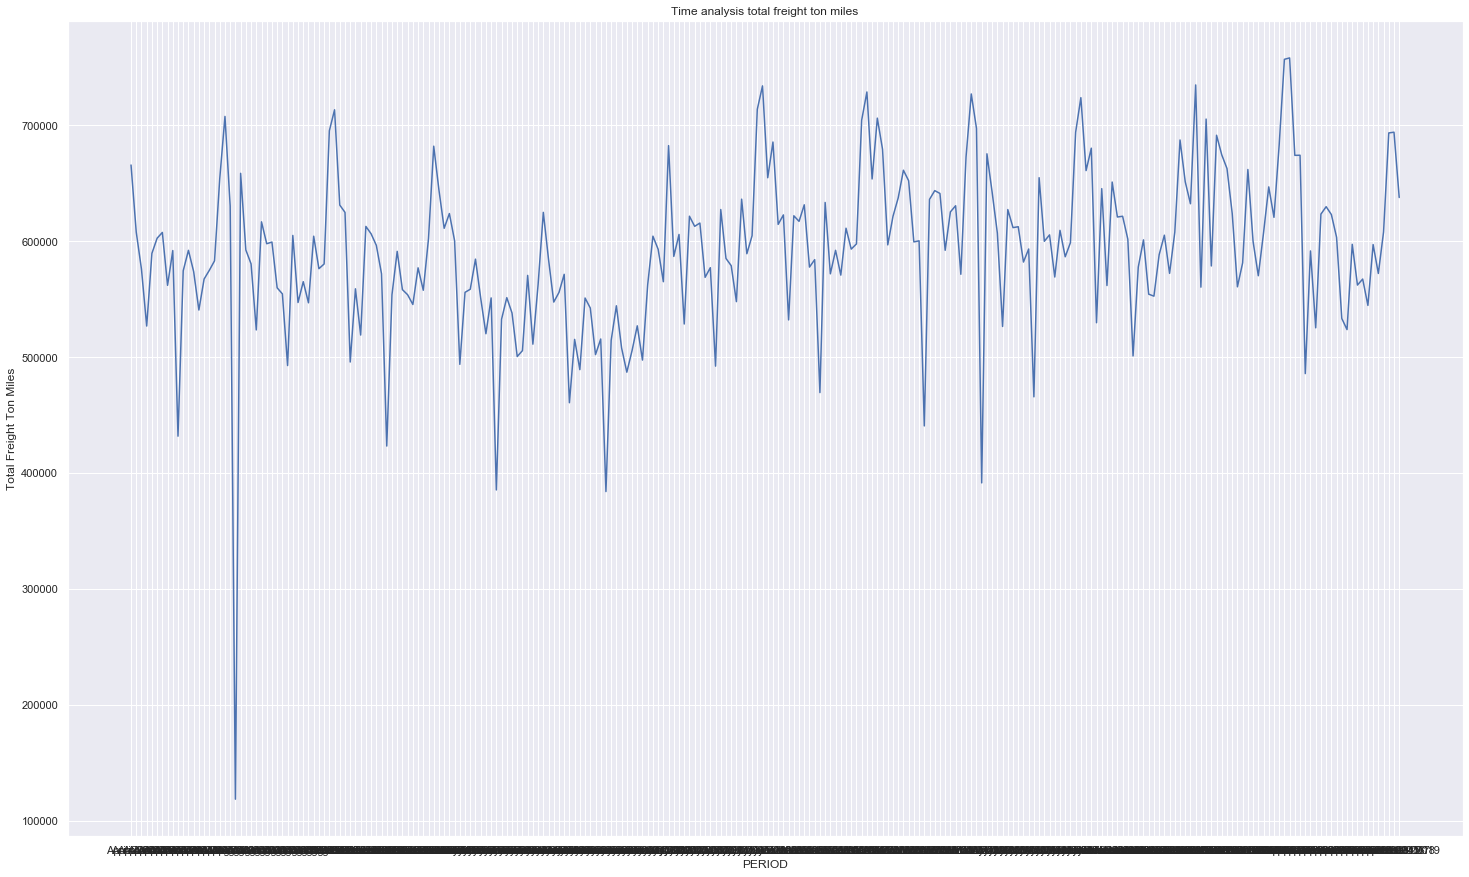

In [57]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_freight_miles.index, y=combined_freight_miles['Total Freight Ton Miles'])

plt.title("Time analysis total freight ton miles")

In [64]:
# IMPORT BTS DOMESTICS FREIGHT TON MILES
dom_flight = pd.read_csv('data-sources/RevenueTonMilesDOM.csv', sep='","', engine='python', skiprows=1)
intl_flight = pd.read_csv('data-sources/RevenueTonMilesIntl.csv', sep='","', engine='python', skiprows=1)

combined_revenue_ton = cleanSet(dom_flight, intl_flight, 'combined_revenue_ton', 'Total Dom. Revenue Ton Miles',
                          'Total Intl Revenue Ton Miles', 'Total Revenue Ton Miles')
combined_revenue_ton

,Total Dom. Revenue Ton Miles,Total Intl Revenue Ton Miles,Total Revenue Ton Miles
PERIOD,,,
January 2000,3778739,1865954,5644693
February 2000,3903013,1834110,5737123
March 2000,4725110,2221637,6946747
April 2000,4514532,2166316,6680848
May 2000,4636425,2272133,6908558
...,...,...,...
December 2019,6676211,3068007,9744218
January 2020,5901693,2893454,8795147
February 2020,5668816,2381016,8049832


Text(0.5, 1.0, 'Time analysis total revenue ton miles')

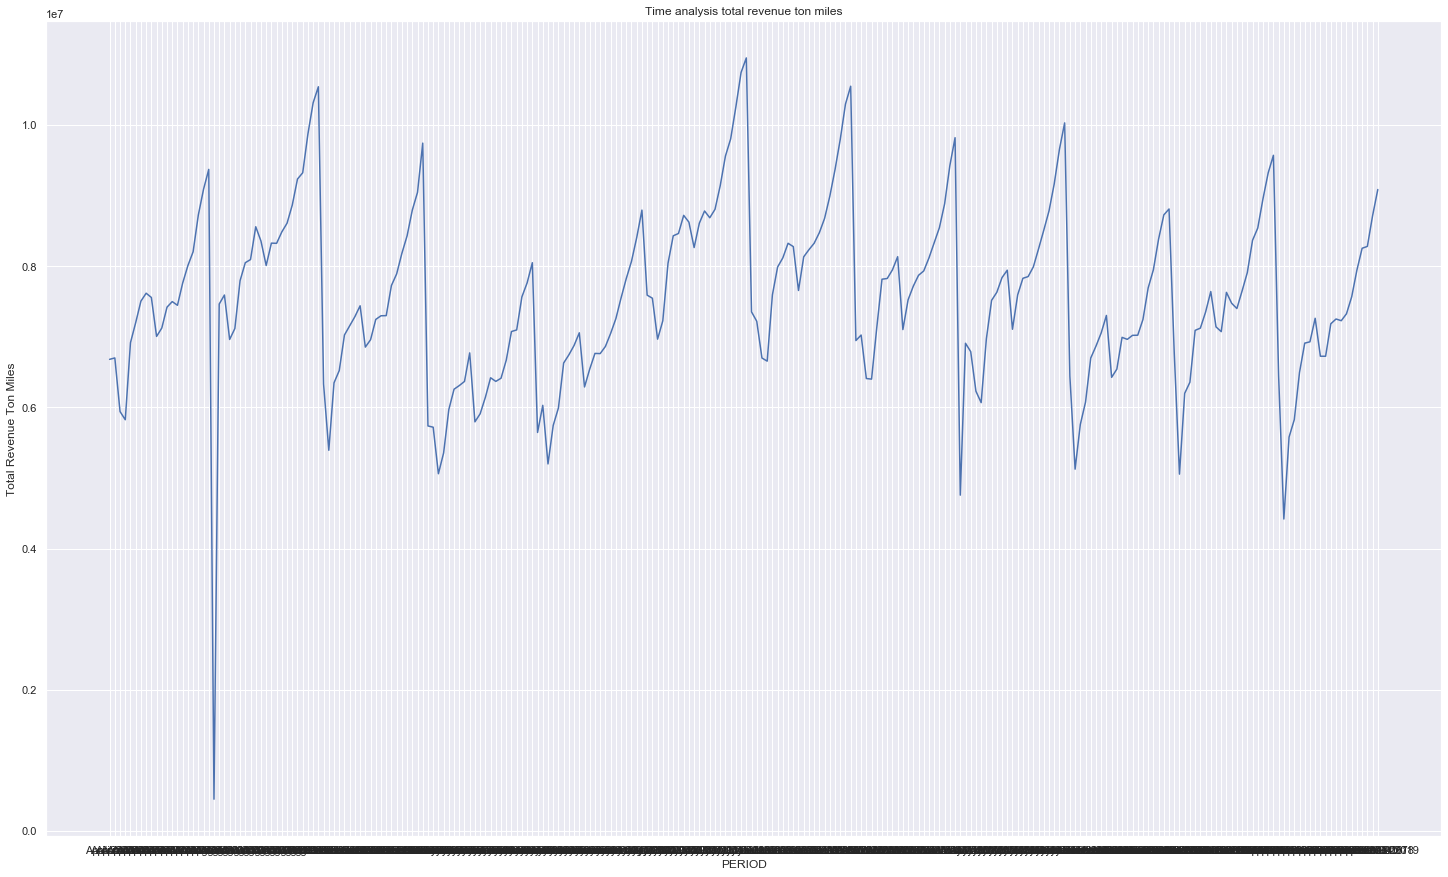

In [65]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_revenue_ton.index, y=combined_revenue_ton['Total Revenue Ton Miles'])

plt.title("Time analysis total revenue ton miles")

In [77]:
combined = pd.concat([jet_fuel, combined_flight, combined_enplanements, combined_revenue_miles,
                     combined_seat_miles, combined_freight_miles, combined_revenue_ton], axis=1) 
combined = combined[combined['Total Dom. Passenger Flights'].notna()]
combined

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,Total Dom. Passenger Flights,Total Intl. Passenger Flights,Total Passenger Flights,Total Dom. Passenger Enplanements,Total Intl. Passenger Enplanements,Total Passenger Enplanements,Total Dom. Revenue Miles,Total Intl Revenue Miles,Total Revenue Miles,Total Dom. Revenue Seat Miles,Total Intl Revenue Seat Miles,Total Revenue Seat Miles,Total Dom. Freight Ton Miles,Total Intl Freight Ton Miles,Total Freight Ton Miles,Total Dom. Revenue Ton Miles,Total Intl Revenue Ton Miles,Total Revenue Ton Miles
April 2000,0.719500,635767,52826,688593.0,1143,10558,11701.0,41963837,16322844,58286681.0,57418335,21659049,79077384.0,167926,497904,665830.0,4514532,2166316,6680848.0
April 2001,0.771762,653498,57968,711466.0,10484,11447,21931.0,42484030,16667615,59151645.0,59026085,22871450,81897535.0,138602,469250,607852.0,4526524,2174177,6700701.0
April 2002,0.667773,629919,51596,681515.0,14437,12624,27061.0,38562404,13979759,52542163.0,54581493,19052236,73633729.0,146719,429198,575917.0,4081821,1859043,5940864.0
April 2003,0.741143,774640,62138,836778.0,49749,15201,64950.0,39897898,11959281,51857179.0,55239973,18128577,73368550.0,154489,372361,526850.0,4221962,1603005,5824967.0
April 2004,0.977450,828140,67597,895737.0,47713,15972,63685.0,46390540,15949576,62340116.0,60864078,20812675,81676753.0,159118,430462,589580.0,4859251,2057727,6916978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
September 2015,1.392952,672803,65306,738109.0,40242,15122,55364.0,50045430,22972298,73017728.0,59869761,28527699,88397460.0,80902,491333,572235.0,5122651,2823315,7945966.0
September 2016,1.321000,686697,65461,752158.0,41872,14894,56766.0,52861742,22873428,75735170.0,62913367,28511866,91425233.0,88164,519872,608036.0,5409953,2844694,8254647.0
September 2017,1.778789,666189,62442,728631.0,42871,14424,57295.0,52077506,23014781,75092287.0,63581279,28988847,92570126.0,94718,598799,693517.0,5340618,2940028,8280646.0
September 2018,2.195250,699366,66517,765883.0,44147,15192,59339.0,55618183,23852325,79470508.0,68891206,30004887,98896093.0,87597,606543,694140.0,5686805,3027762,8714567.0


# Cargo from here

In [18]:
# IMPORT BTS DOMESTICS DATA DEPARTURES PERFORMED
dom_flight = pd.read_csv('data-sources/USCarrier_Traffic_cargo_DOM.csv', sep='","', engine='python', skiprows=1)
intl_flight = pd.read_csv('data-sources/USCarrier_Traffic_cargo_INTL.csv', sep='","', engine='python', skiprows=1)

combined_cargo = cleanSet(dom_flight, intl_flight, 'combined_cargo',
                         'Total Dom. Cargo Flights', 'Total Intl. Cargo Flights',
                         'Total Cargo Flights')

combined_cargo

,Total Dom. Cargo Flights,Total Intl. Cargo Flights,Total Cargo Flights
PERIOD,,,
January 2000,954,10423,11377
February 2000,985,10639,11624
March 2000,1060,11598,12658
April 2000,1143,10558,11701
May 2000,1095,12209,13304
...,...,...,...
December 2019,56928,14118,71046
January 2020,48607,15027,63634
February 2020,44918,13646,58564


## EDA on new dataset

Text(0.5, 1.0, 'Time analysis total flight cargo departures')

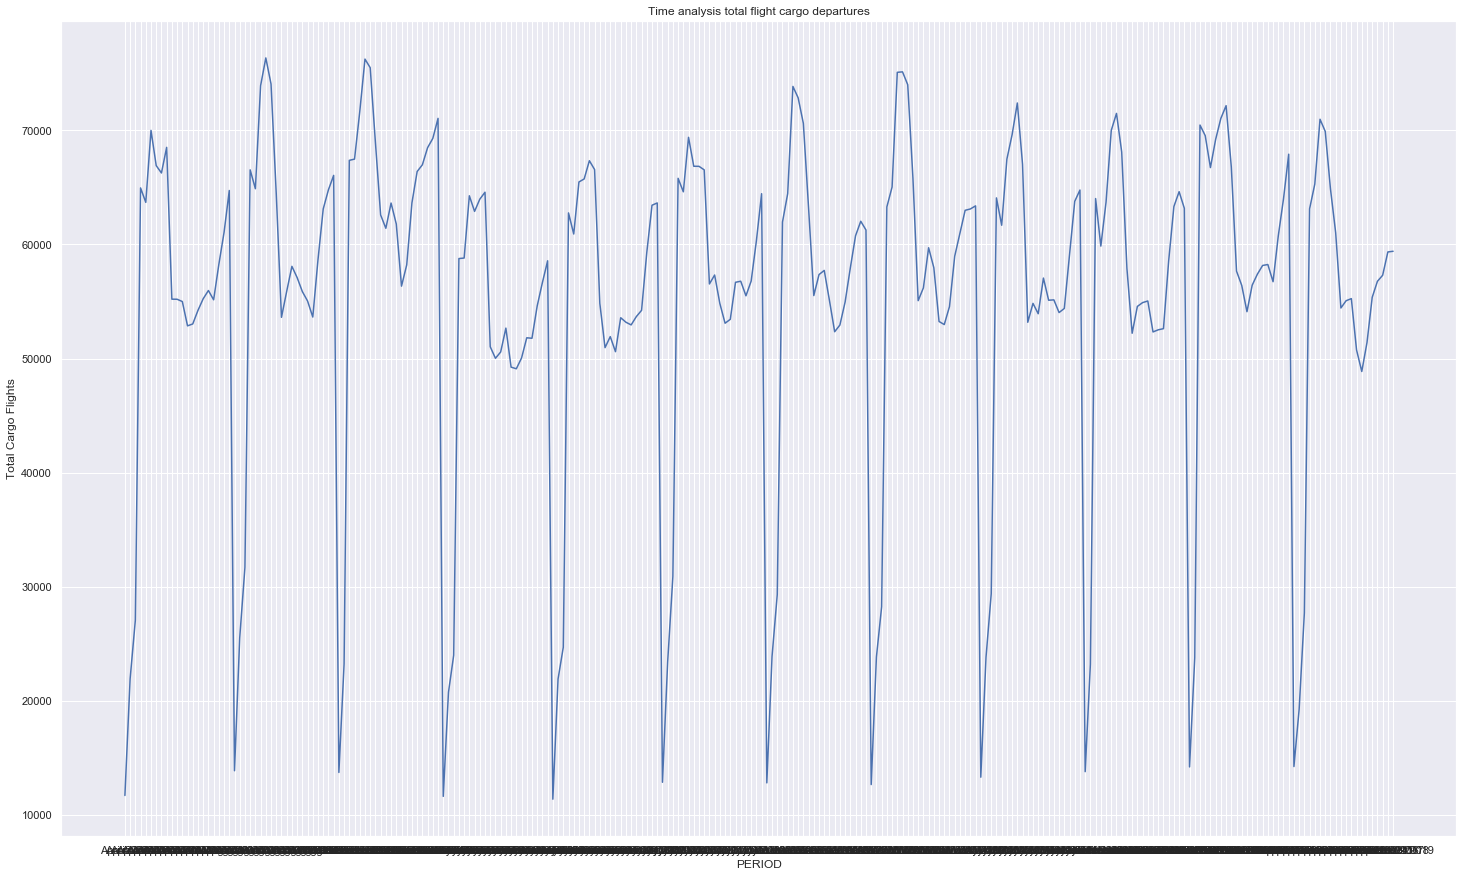

In [22]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_cargo.index, y=combined_cargo['Total Cargo Flights'])

plt.title("Time analysis total flight cargo departures")

Similar to passenger, yet seems rather unaffected by time. Remains pretty static over time.

Text(0.5, 1.0, 'Time analysis total domestic flight cargo departures')

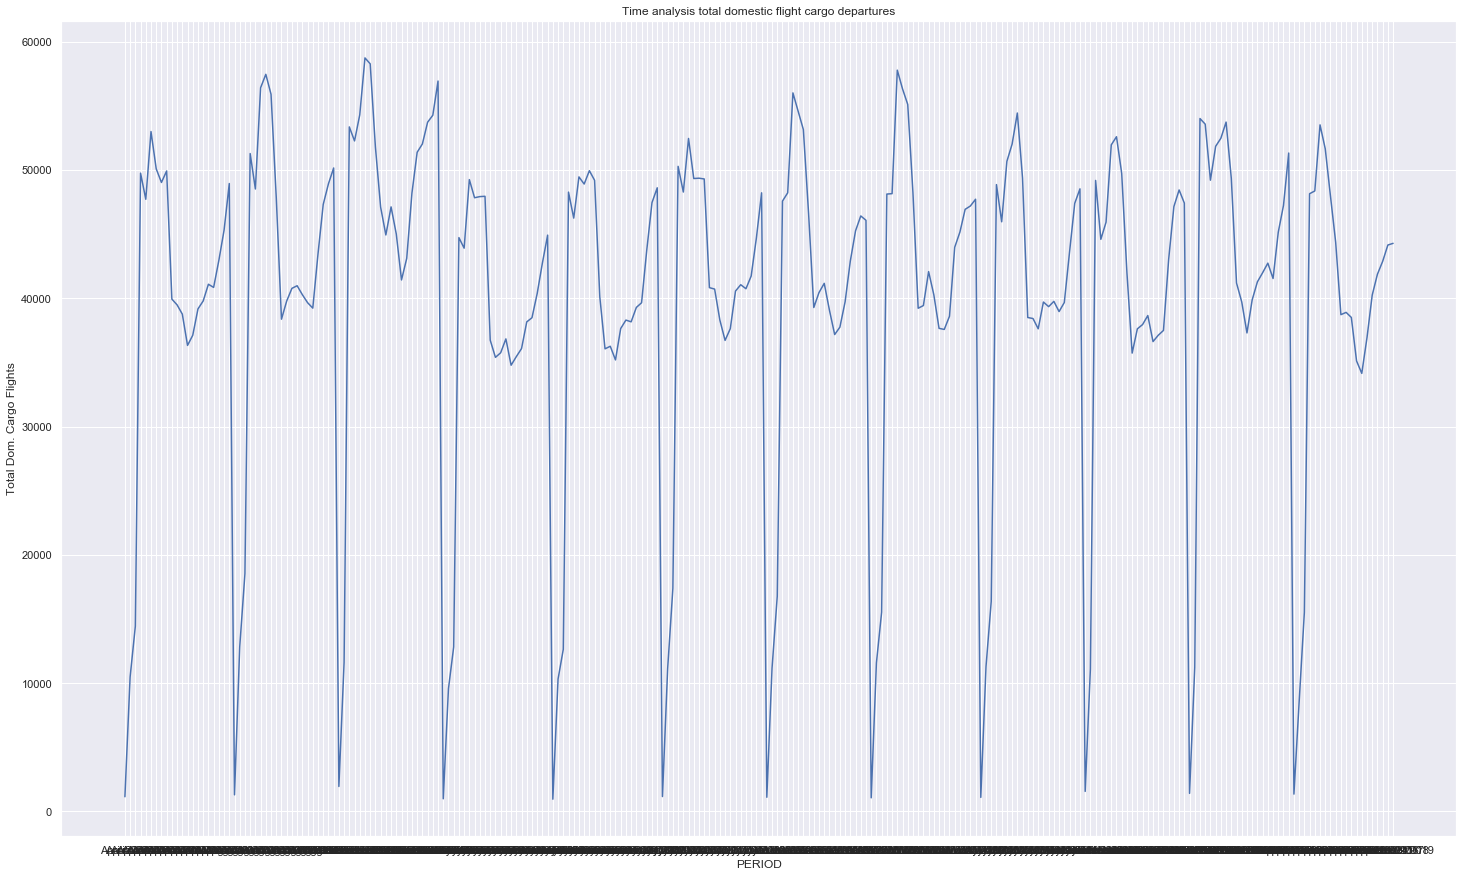

In [23]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_cargo.index, y=combined_cargo['Total Dom. Cargo Flights'].astype(float))

plt.title("Time analysis total domestic flight cargo departures")

Text(0.5, 1.0, 'Time analysis total international flight cargo departures')

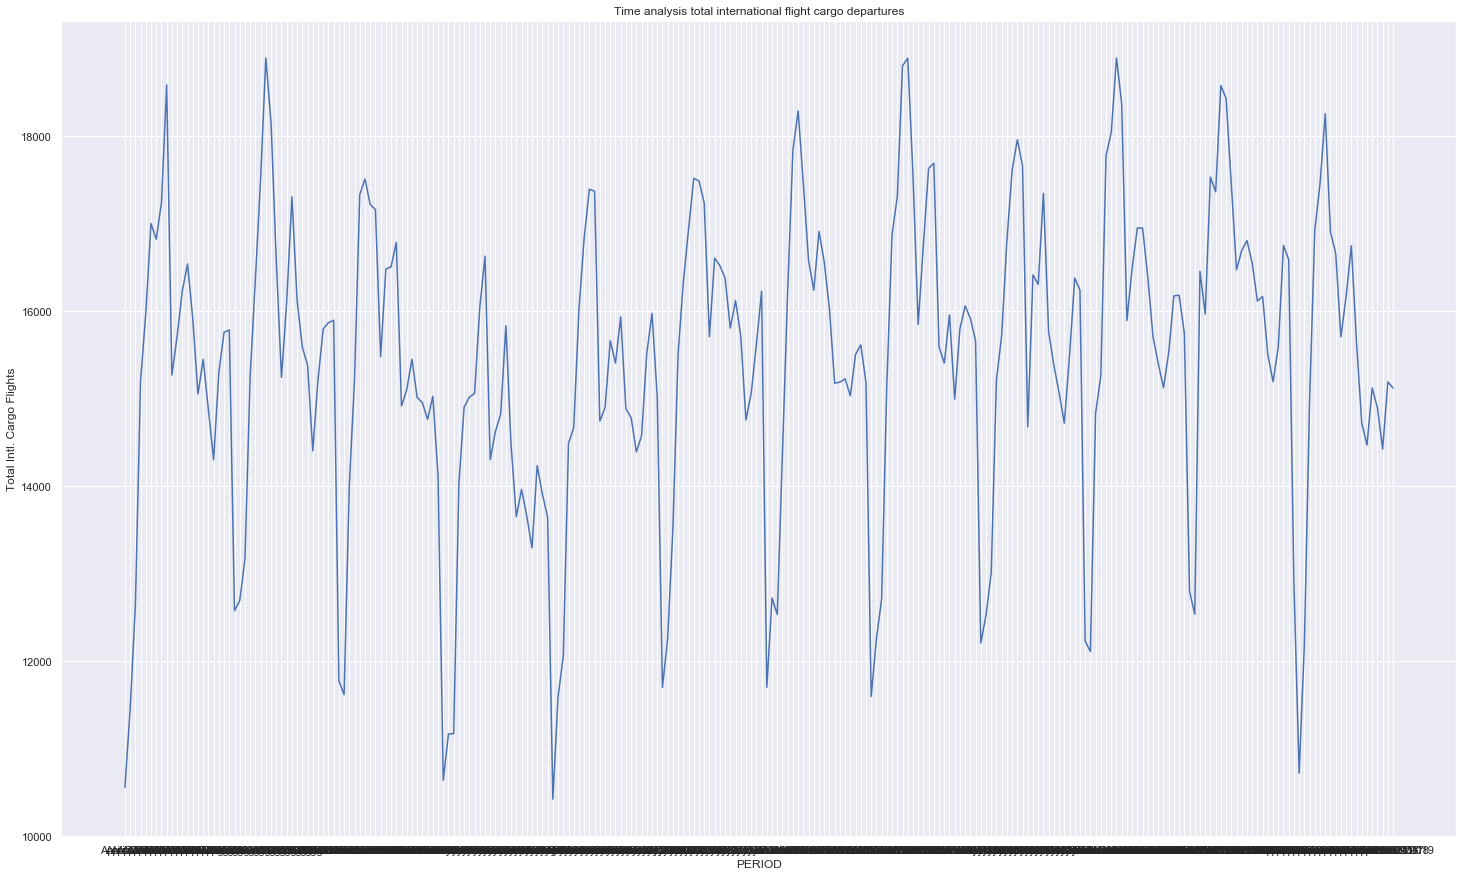

In [24]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_cargo.index, y=combined_cargo['Total Intl. Cargo Flights'].astype(float))

plt.title("Time analysis total international flight cargo departures")

International cargo flights seem to be less stable, but seems to be unaffected by COVID.

In [61]:
# IMPORT BTS DOMESTICS COMBINED CARGO ENPLANEMENTS PERFORMED
dom_flight = pd.read_csv('data-sources/FreightTonMilesCargoDOM.csv', sep='","', engine='python', skiprows=1)
intl_flight = pd.read_csv('data-sources/FreightTonMilesCargoINTL.csv', sep='","', engine='python', skiprows=1)

combined_cargo_freight = cleanSet(dom_flight, intl_flight, 'combined_cargo_freight', 'Total Dom. Cargo Freight Ton Miles',
                          'Total Intl. Cargo Freight Ton Miles', 'Total Cargo Freight Ton Miles')

In [62]:
combined_cargo_freight

,Total Dom. Cargo Freight Ton Miles,Total Intl. Cargo Freight Ton Miles,Total Cargo Freight Ton Miles
PERIOD,,,
January 2000,171973,985514,1157487
February 2000,188255,1071394,1259649
March 2000,221512,1260874,1482386
April 2000,213114,1160212,1373326
May 2000,221958,1192193,1414151
...,...,...,...
December 2019,1489985,2047471,3537456
January 2020,1258004,2047453,3305457
February 2020,1096447,1763931,2860378


Text(0.5, 1.0, 'Time analysis total freight ton miles')

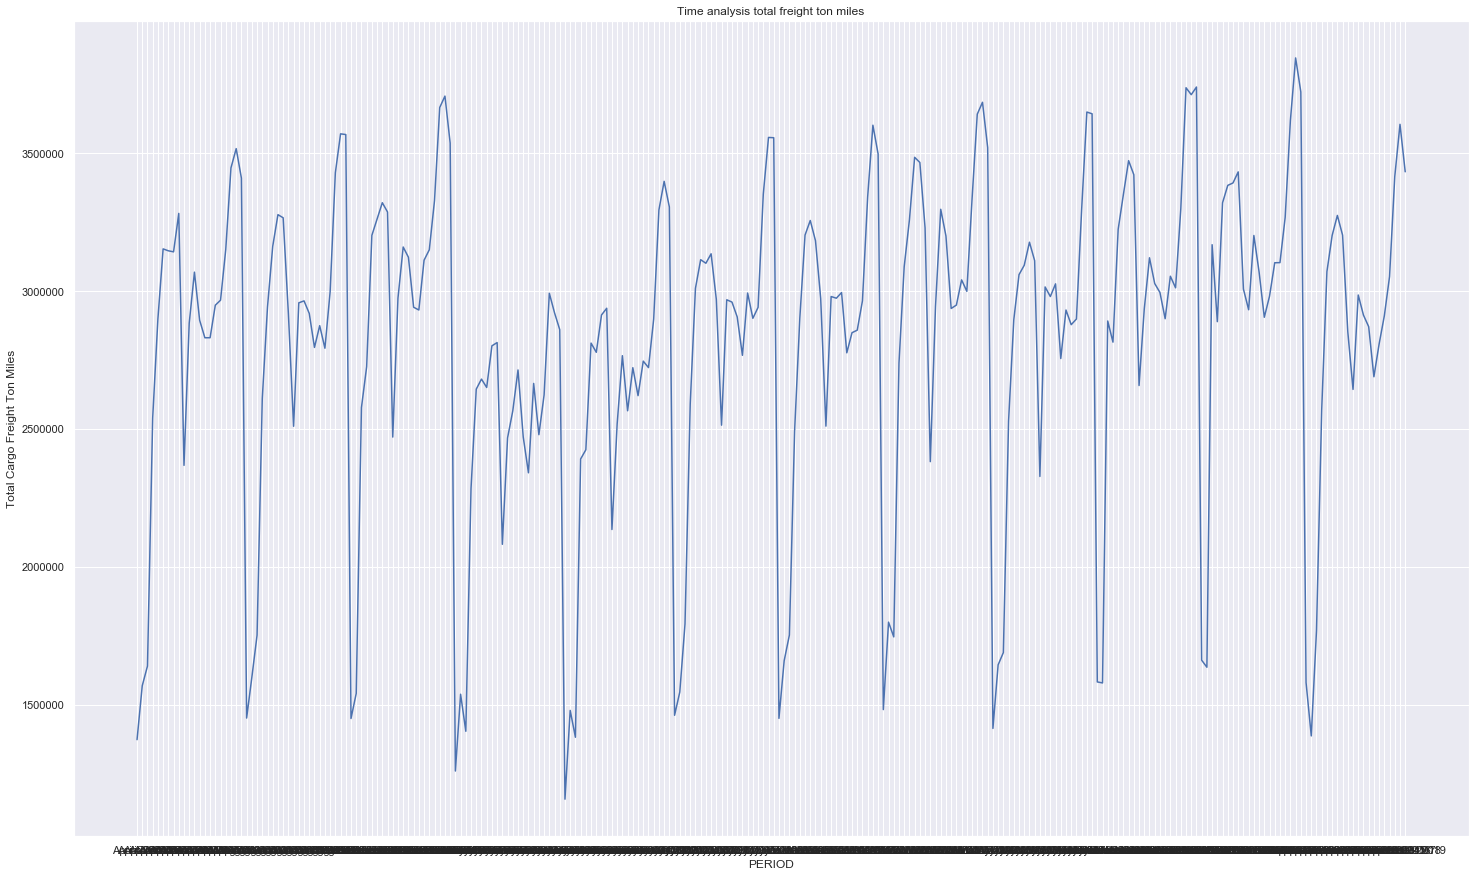

In [63]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_cargo_freight.index, y=combined_cargo_freight['Total Cargo Freight Ton Miles'])

plt.title("Time analysis total freight ton miles")

In [67]:
# IMPORT BTS DOMESTICS COMBINED CARGO ENPLANEMENTS PERFORMED
dom_flight = pd.read_csv('data-sources/RevenueTonMilesCargoDOM.csv', sep='","', engine='python', skiprows=1)
intl_flight = pd.read_csv('data-sources/RevenueTonMilesCargoINTL.csv', sep='","', engine='python', skiprows=1)

combined_cargo_rev = cleanSet(dom_flight, intl_flight, 'combined_cargo_rev', 'Total Dom. Cargo Revenue Ton Miles',
                          'Total Intl. Cargo Revenue Ton Miles', 'Total Cargo Revenue Ton Miles')
combined_cargo_rev

,Total Dom. Cargo Revenue Ton Miles,Total Intl. Cargo Revenue Ton Miles,Total Cargo Revenue Ton Miles
PERIOD,,,
January 2000,35485,570688,606173
February 2000,34089,606567,640656
March 2000,44465,736502,780967
April 2000,45204,665856,711060
May 2000,46600,700698,747298
...,...,...,...
December 2019,1440590,1527672,2968262
January 2020,1204853,1567917,2772770
February 2020,1041593,1303777,2345370


Text(0.5, 1.0, 'Time analysis total revenue ton miles')

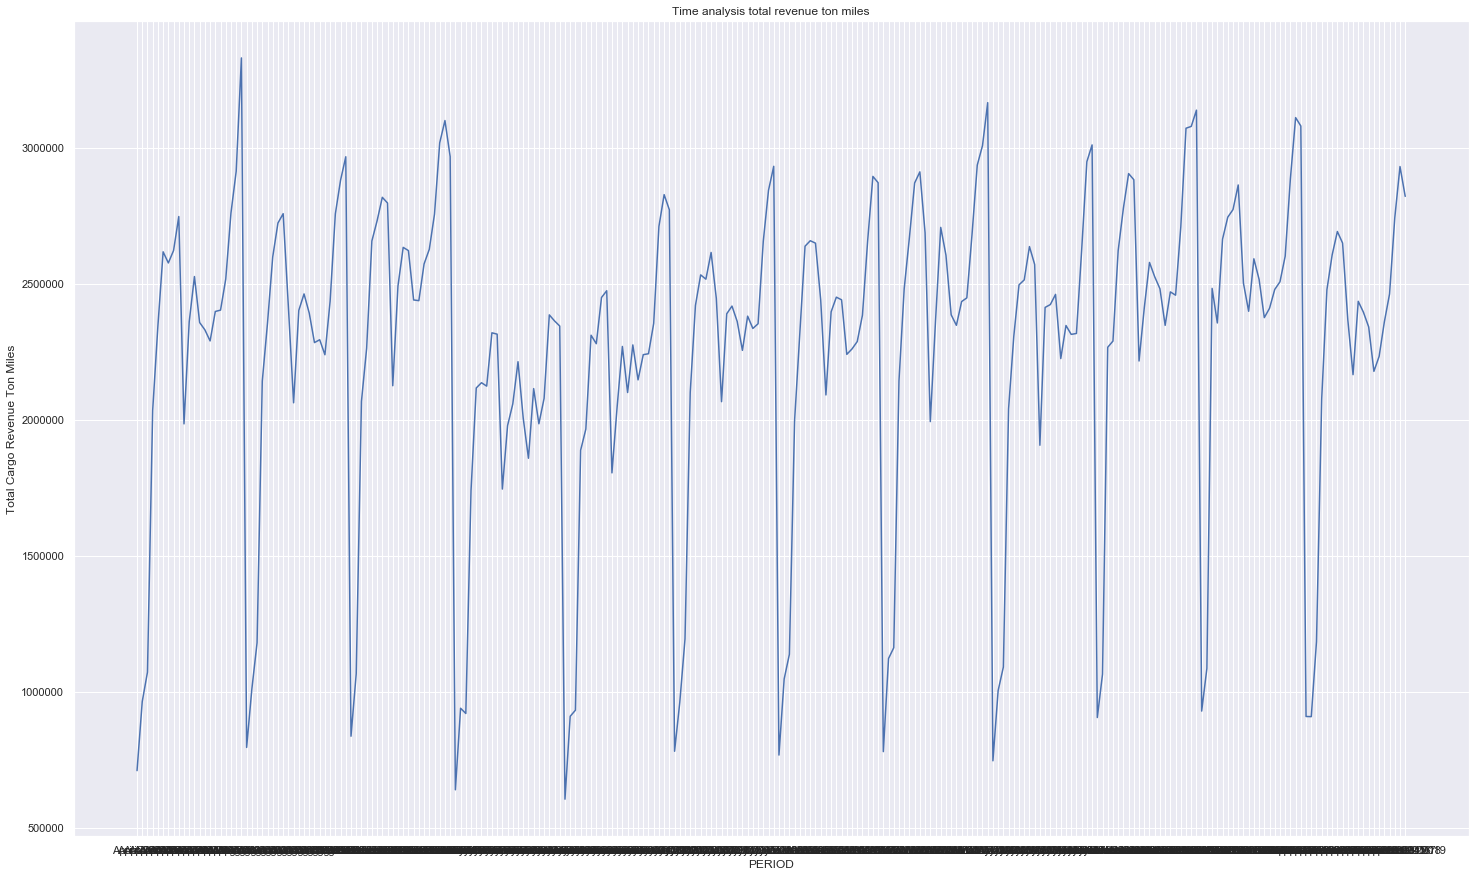

In [68]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_cargo_rev.index, y=combined_cargo_rev['Total Cargo Revenue Ton Miles'])

plt.title("Time analysis total revenue ton miles")

In [80]:
combined_c = pd.concat([combined_cargo, combined_cargo_freight, combined_cargo_rev], axis=1) 
combined_c = combined_c[combined_c['Total Cargo Revenue Ton Miles'].notna()]
combined_c

,Total Dom. Cargo Flights,Total Intl. Cargo Flights,Total Cargo Flights,Total Dom. Cargo Freight Ton Miles,Total Intl. Cargo Freight Ton Miles,Total Cargo Freight Ton Miles,Total Dom. Cargo Revenue Ton Miles,Total Intl. Cargo Revenue Ton Miles,Total Cargo Revenue Ton Miles
PERIOD,,,,,,,,,
January 2000,954,10423,11377,171973,985514,1157487,35485,570688,606173
February 2000,985,10639,11624,188255,1071394,1259649,34089,606567,640656
March 2000,1060,11598,12658,221512,1260874,1482386,44465,736502,780967
April 2000,1143,10558,11701,213114,1160212,1373326,45204,665856,711060
May 2000,1095,12209,13304,221958,1192193,1414151,46600,700698,747298
...,...,...,...,...,...,...,...,...,...
December 2019,56928,14118,71046,1489985,2047471,3537456,1440590,1527672,2968262
January 2020,48607,15027,63634,1258004,2047453,3305457,1204853,1567917,2772770
February 2020,44918,13646,58564,1096447,1763931,2860378,1041593,1303777,2345370
